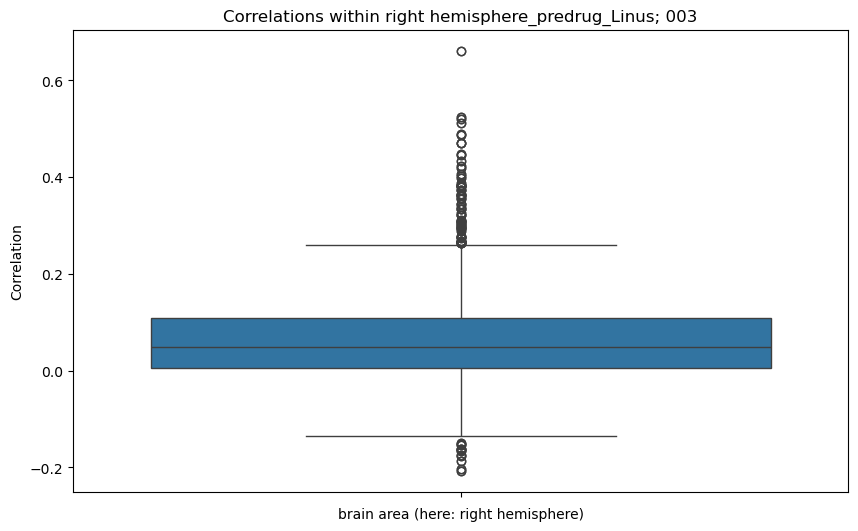

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Ensure output directory exists
os.makedirs("diagrams/boxplot", exist_ok=True)

file_predrug = 'correlation_files/csv_tables/correlation_matrix_long_format_predrug_003.csv'
file_postdrug = 'correlation_files/csv_tables/correlation_matrix_long_format_postdrug_003.csv'

# Please insert which hemisphere you are analysing
hemisphere = 'right'

# Please insert which session you want to analyse
session = 'predrug'

#Please insert with which file you are working from run_30 (prefix number)
prefix_number = '003'

#Please insert with which subject data you are working
subject = 'Linus'

file = file_predrug if session == 'predrug' else file_postdrug
df = pd.read_csv(file)

prefix = 'CR' if hemisphere == 'right' else 'CL'

    # Filter file with preconditions
df_long_filtered = df[(df['Variable1'].str.startswith(prefix)) &
                      (df['Variable2'].str.startswith(prefix)) &
                      (df['Correlation'] != 1)]

    # Generate violin diagram
plt.figure(figsize=(10,6))
sns.boxplot(data= df_long_filtered, y='Correlation')

    # Further modifications on diagram
plt.title(f'Correlations within {hemisphere} hemisphere_{session}_{subject}; {prefix_number}')
plt.xlabel(f'brain area (here: {hemisphere} hemisphere)')
plt.ylabel('Correlation')
plt.savefig(f"diagrams/boxplot/Correlation within {hemisphere} hemisphere_{session}_{subject}_{prefix_number}", dpi=300, bbox_inches='tight')
plt.show()


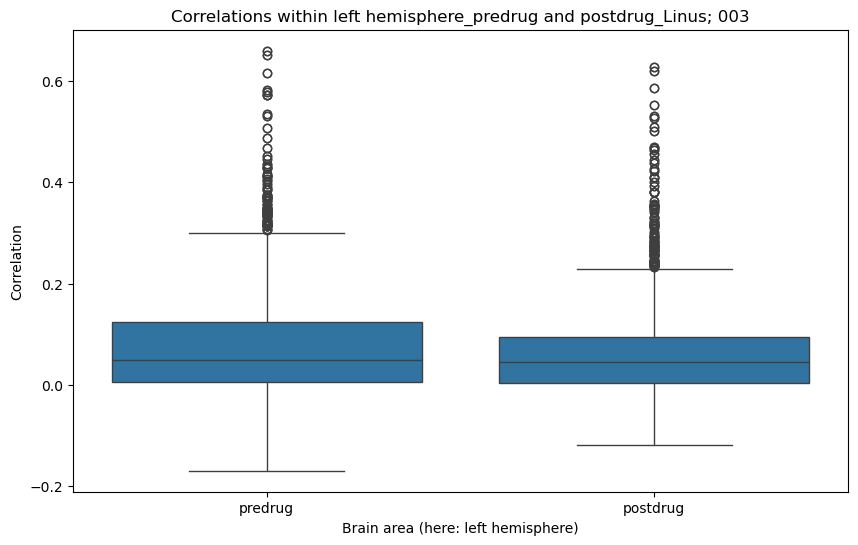

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Ensure output directory exists
os.makedirs("diagrams/boxplot", exist_ok=True)

# Please insert which hemisphere and session you are analyzing
hemisphere = 'left'  # Change to 'left' as needed

#Please insert with which file you are working from run_30 (prefix number)
prefix_number = '003'

#Please insert with which subject data you are working
subject = 'Linus'
session = 'predrug and postdrug'  

# Load both CSV files
df_predrug = pd.read_csv('correlation_files/csv_tables/correlation_matrix_long_format_predrug_003.csv')
df_postdrug = pd.read_csv('correlation_files/csv_tables/correlation_matrix_long_format_postdrug_003.csv')

# Add a condition column to each DataFrame
df_predrug['Condition'] = 'predrug'
df_postdrug['Condition'] = 'postdrug'

# Combine both DataFrames
df_combined = pd.concat([df_predrug, df_postdrug], ignore_index=True)

# Define filter prefix based on hemisphere
prefix = 'CR_' if hemisphere == 'right' else 'CL_'

# Apply filtering conditions
df_combined_filtered = df_combined[(df_combined['Variable1'].str.startswith(prefix)) &
                                   (df_combined['Variable2'].str.startswith(prefix)) & 
                                   (df_combined['Correlation'] != 1)
]

# Generate violin diagram
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_combined_filtered, x="Condition", y="Correlation")

# Customize diagram
plt.title(f'Correlations within {hemisphere} hemisphere_{session}_{subject}; {prefix_number}')
plt.xlabel(f'Brain area (here: {hemisphere} hemisphere)')
plt.ylabel('Correlation')
plt.savefig(f"diagrams/boxplot/Correlation_within_{hemisphere}_hemisphere_{session}_{subject}_{prefix_number}.png", dpi=300, bbox_inches='tight')
plt.show()
